In [1]:
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
    return data

In [3]:
paths = glob.glob('data/all/*.json')

dflist = []
for path in paths:
    tdf = pd.DataFrame(load_data(path))
    tdf = tdf[['p1_chara_id','p2_chara_id','winner']]
    dflist.append(tdf)
df = pd.concat(dflist).reset_index(drop=True)
df

,p1_chara_id,p2_chara_id,winner
0,8,4,2
1,40,40,1
2,8,23,1
3,4,4,1
4,40,6,1
...,...,...,...
599595,18,21,1
599596,14,3,2
599597,32,13,1
599598,8,33,1


In [4]:
sorted(df['p1_chara_id'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 28,
 29,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40]

In [5]:
winlose = list(map(lambda x:{'chara_id': x, 'win': 0, 'lose': 0}, range(41)))
for idx, row in df.iterrows():
    if row['winner'] == 1:
        winlose[row['p1_chara_id']]['win'] += 1
        winlose[row['p2_chara_id']]['lose'] += 1
    elif row['winner'] == 2:
        winlose[row['p2_chara_id']]['win'] += 1
        winlose[row['p1_chara_id']]['lose'] += 1
winlose = pd.DataFrame(winlose)
winlose

,chara_id,win,lose
0,0,17941,17657
1,1,18909,19199
2,2,27415,28472
3,3,16911,17426
4,4,22320,23430
5,5,10501,11266
6,6,27827,28845
7,7,27089,27641
8,8,28582,31347
9,9,19219,21236


In [6]:
winlose['winrate'] = winlose['win'] / (winlose['win'] + winlose['lose'])

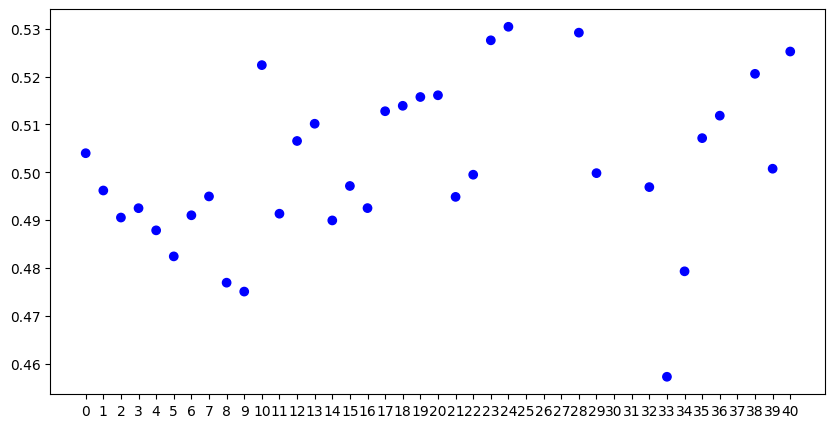

In [7]:
plt.figure(figsize=(10, 5))
plt.xticks(range(41))
plt.scatter(winlose['chara_id'], winlose['winrate'], marker='o', linestyle='', color='b')
plt.show()

In [10]:
winlose

,chara_id,win,lose,winrate
0,0,17941,17657,0.503989
1,1,18909,19199,0.496195
2,2,27415,28472,0.490543
3,3,16911,17426,0.492501
4,4,22320,23430,0.487869
5,5,10501,11266,0.482428
6,6,27827,28845,0.491018
7,7,27089,27641,0.494957
8,8,28582,31347,0.476931
9,9,19219,21236,0.475071
